# Homework 6 - Week 6

#### Question 14.1


The breast cancer data set breast-cancer-wisconsin.data.txt from http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
(description at http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29 ) has missing values.
1. Use the mean/mode imputation method to impute values for the missing data.
2. Use regression to impute values for the missing data.
3. Use regression with perturbation to impute values for the missing data.
4. (Optional) Compare the results and quality of classification models (e.g., SVM, KNN) build using
    1. the data sets from questions 1,2,3;
    2. the data that remains after data points with missing values are removed; and
    3. the data set when a binary variable is introduced to indicate missing values.

**First I have used mean impuation method, then mode imputation, then using regression to impute missing data, and lastly with
perturbation to impute the missing data. I have tried to check the accuracy of the imputed data by checking the model accuracy of a regression model created using the imputed data.**

In [1]:
cancer_data <- read.table("breast-cancer-wisconsin.data.txt", sep = ",",na = c('?'))
head(cancer_data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4


In [2]:
cancer_data$V11[which(cancer_data$V11 == 2)] = "Benign"
cancer_data$V11[which(cancer_data$V11 == 4)] = "Malignant"

In [3]:
summary(cancer_data)

       V1                 V2               V3               V4        
 Min.   :   61634   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.:  870688   1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 1171710   Median : 4.000   Median : 1.000   Median : 1.000  
 Mean   : 1071704   Mean   : 4.418   Mean   : 3.134   Mean   : 3.207  
 3rd Qu.: 1238298   3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000  
 Max.   :13454352   Max.   :10.000   Max.   :10.000   Max.   :10.000  
                                                                      
       V5               V6               V7               V8        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000  
 Median : 1.000   Median : 2.000   Median : 1.000   Median : 3.000  
 Mean   : 2.807   Mean   : 3.216   Mean   : 3.545   Mean   : 3.438  
 3rd Qu.: 4.000   3rd Qu.: 4.000   3rd Qu.: 6.000   3rd Qu.: 5.000  
 Max.   :10.000   

**Apparently V7 has 16 missing values. Next, Lets calculate percent of missing data**

In [4]:
percent_miss <- function(x){sum(is.na(x))/length(x)*100}
apply(cancer_data, 2, percent_miss)

V1       V2       V3       V4       V5       V6       V7       V8 
0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 2.288984 0.000000 
      V9      V10      V11 
0.000000 0.000000 0.000000

**So thats about 2.29% of data that is missing**


**Using library(mice) for looking at missing data pattern.**

In [6]:
library(mice)

,V1,V2,V3,V4,V5,V6,V8,V9,V10,V11,V7,
683,1,1,1,1,1,1,1,1,1,1,1,0
16,1,1,1,1,1,1,1,1,1,1,0,1
,0,0,0,0,0,0,0,0,0,0,16,16


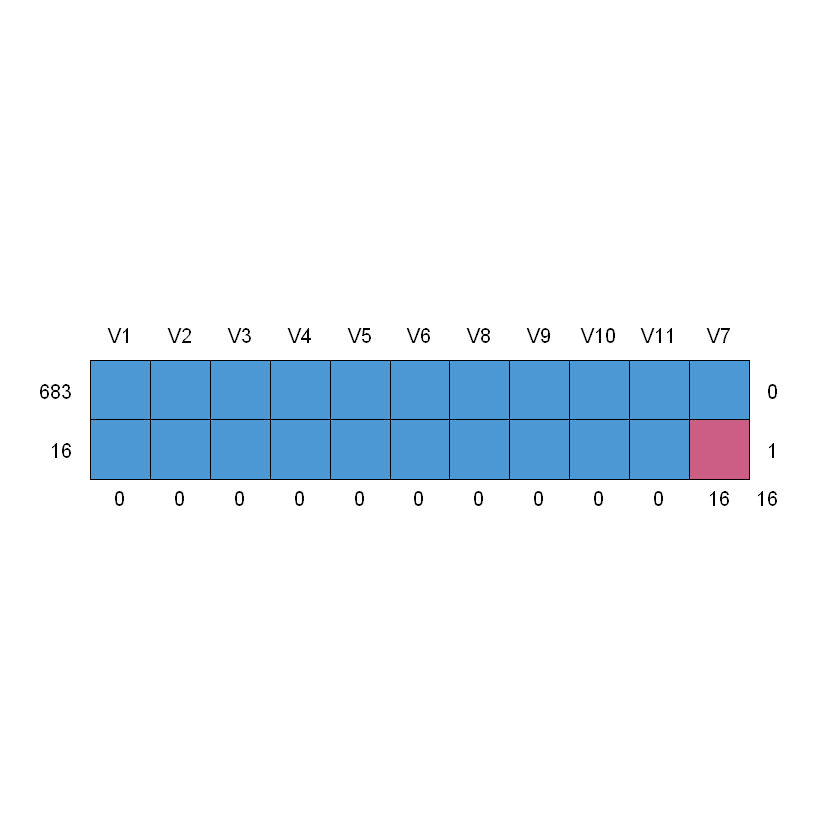

In [7]:
md.pattern(cancer_data)

**The output tells us that 683 samples are complete, 16 samples miss only in V7 (Bare Nuclei). Next, I am going to visualize this using the VIM package**

In [9]:
# install.packages("VIM", repos='http://cran.us.r-project.org')
library(VIM)


 Variables sorted by number of missings: 
 Variable      Count
       V7 0.02288984
       V1 0.00000000
       V2 0.00000000
       V3 0.00000000
       V4 0.00000000
       V5 0.00000000
       V6 0.00000000
       V8 0.00000000
       V9 0.00000000
      V10 0.00000000
      V11 0.00000000


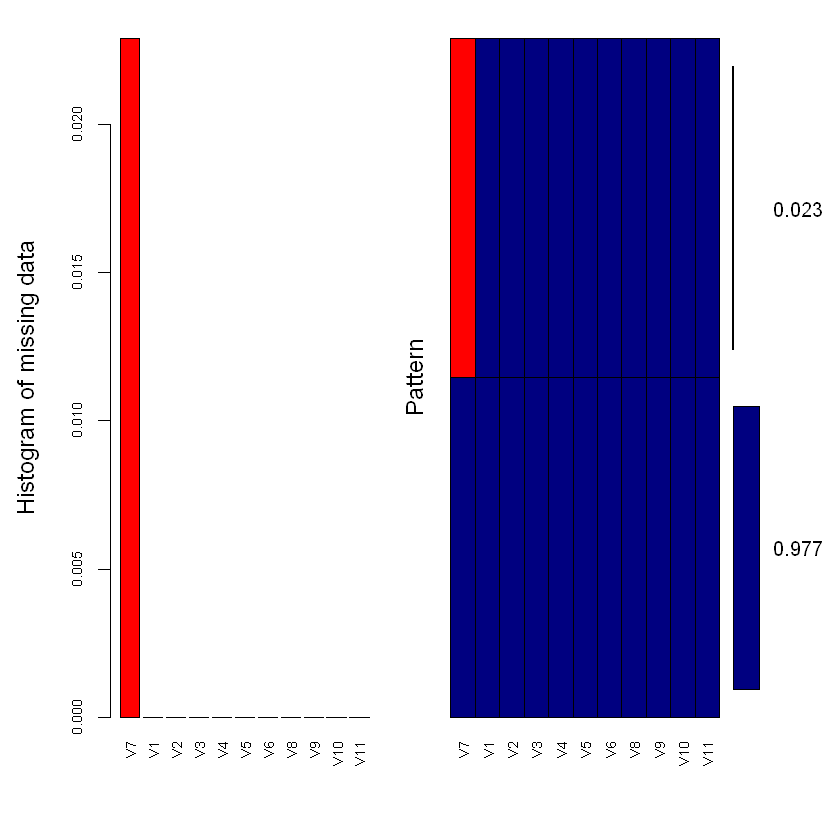

In [10]:
aggr_plot <- aggr(cancer_data, col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE,
                  labels=names(cancer_data), cex.axis=.7, gap=3,
                  ylab=c("Histogram of missing data","Pattern")
                 )

**The above histogram shows that almost 97.7% of dataset is not missing any data. 2.29% of missing values seem to be concentrated in V7.**

**Now, I am going to use mean imputation technique**

In [11]:
cancer_data_mean <- cancer_data

In [12]:
head(cancer_data_mean)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1000025,5,1,1,1,2,1,3,1,1,Benign
1002945,5,4,4,5,7,10,3,2,1,Benign
1015425,3,1,1,1,2,2,3,1,1,Benign
1016277,6,8,8,1,3,4,3,7,1,Benign
1017023,4,1,1,3,2,1,3,1,1,Benign
1017122,8,10,10,8,7,10,9,7,1,Malignant


**The below is a way of showing missing data in a dataset. This shows that column V7 has 16 missing values.**

In [13]:
sapply(cancer_data_mean, function(x) sum(is.na(x)))

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 
  0   0   0   0   0   0  16   0   0   0   0

In [14]:
for(i in 1:ncol(cancer_data_mean[,-11])){
    cancer_data_mean[is.na(cancer_data_mean[,i]), i] <- round(mean(cancer_data_mean[,i], na.rm = TRUE),0)
}

In [15]:
# Checking if any missing values in the imputed data set. Shows no missing values
sapply(cancer_data_mean, function(x) sum(is.na(x)))

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 
  0   0   0   0   0   0   0   0   0   0   0

**Next, I am going to use mode imputation technique. I got the Mode function from stackoverflow link:**

https://stackoverflow.com/questions/2547402/is-there-a-built-in-function-for-finding-the-mode/8189441#8189441

In [16]:
sapply(cancer_data, function(x) sum(is.na(x)))

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 
  0   0   0   0   0   0  16   0   0   0   0

In [17]:
cancer_data_mode <- cancer_data

In [18]:
val <- unique(cancer_data_mode[!is.na(cancer_data_mode)])

In [19]:
val <- unique(cancer_data_mode[!is.na(cancer_data_mode)]) # Values in cancer_data_mode
mode <- val[which.max(tabulate(match(cancer_data_mode, val)))] # Mode of cancer_data_mode

In [20]:
mode

[1] " 1000025"

In [21]:
cancer_data_imp <- cancer_data_mode # Replicate vec_miss
cancer_data_imp[is.na(cancer_data_imp)] <- mode # Impute by mode

In [22]:
indices <- which(!is.na(cancer_data_mode$V7), arr.ind = T)

In [23]:
Mode <- function(x) {
    ux <- unique(x)
    ux[which.max(tabulate(match(x, ux)))]
}

mode_value <- Mode(cancer_data_mode$V7[indices])
cancer_data_mode$V7[-indices] <- mode_value

In [24]:
sapply(cancer_data_mode, function(x) sum(is.na(x)))

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 
  0   0   0   0   0   0   0   0   0   0   0

**Using regression (using mice) to impute missing data**

In [25]:
mice_data <- cancer_data
mice_data$V11[which(mice_data$V11 == 'Benign')] = 2
mice_data$V11[which(mice_data$V11 == 'Malignant')] = 4
head(mice_data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4


From mice documentation,
   
   meth = 'norm.predict' is Imputation by linear regression through prediction
   
   meth = 'norm.nob' is Imputation by linear regression without parameter uncertainty (with perturbation)

In [26]:
# Imputation by linear regression through prediction

imp.mice <- mice(mice_data, m=1, maxit=50, meth='norm.predict', seed=500)
# summary(imp.mice)


 iter imp variable
  1   1  V7
  2   1  V7
  3   1  V7
  4   1  V7
  5   1  V7
  6   1  V7
  7   1  V7
  8   1  V7
  9   1  V7
  10   1  V7
  11   1  V7
  12   1  V7
  13   1  V7
  14   1  V7
  15   1  V7
  16   1  V7
  17   1  V7
  18   1  V7
  19   1  V7
  20   1  V7
  21   1  V7
  22   1  V7
  23   1  V7
  24   1  V7
  25   1  V7
  26   1  V7
  27   1  V7
  28   1  V7
  29   1  V7
  30   1  V7
  31   1  V7
  32   1  V7
  33   1  V7
  34   1  V7
  35   1  V7
  36   1  V7
  37   1  V7
  38   1  V7
  39   1  V7
  40   1  V7
  41   1  V7
  42   1  V7
  43   1  V7
  44   1  V7
  45   1  V7
  46   1  V7
  47   1  V7
  48   1  V7
  49   1  V7
  50   1  V7


Warning message:
"Number of logged events: 1"

In [27]:
imp.mice$imp$V7

,1
24,5.3669508
41,8.1907122
140,0.8738591
146,1.6463893
159,1.0731978
165,2.1870186
236,2.7459168
250,2.0127161
276,2.3072038
293,5.9989744


**The output shows the imputed data for each observation (first column left) within each imputed dataset (first row at the top). Next, using the complete() function, I am getting a completed dataset. Here, the missing values have been replaced with the imputed values in the first of the five datasets.**

**Inspecting the distribution of original and imputed data : The density of the imputed data for each imputed dataset is showed in magenta while the density of the observed data is showed in blue.**

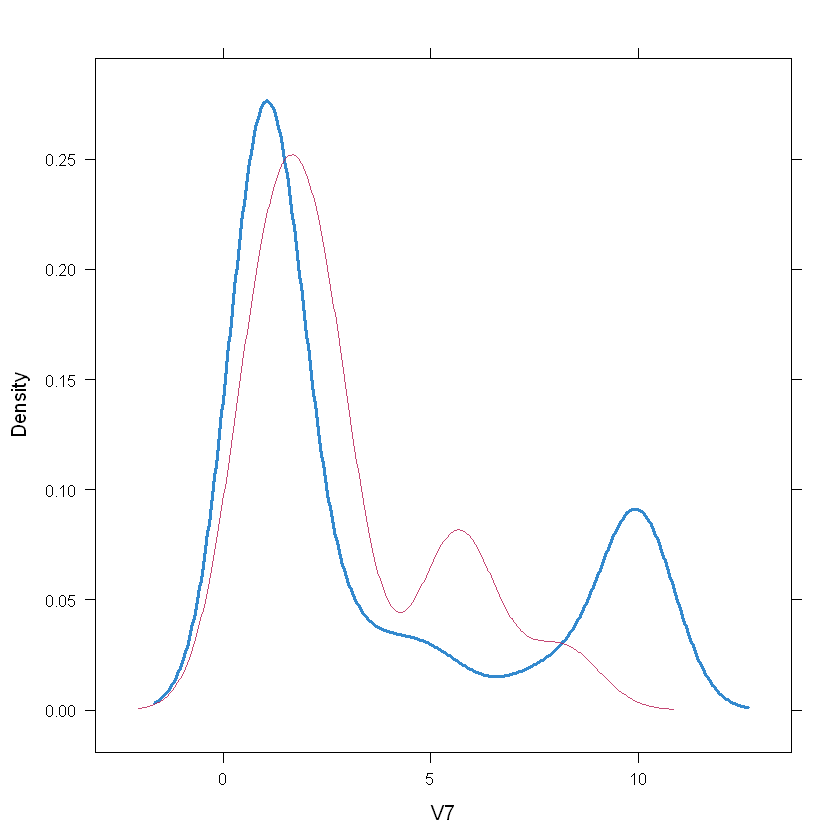

In [28]:
densityplot(imp.mice)

In [29]:
completed_cancer_data <- complete(imp.mice,1)

In [30]:
lm.mice.out <- with(imp.mice, lm(V11 ~ V1+V2+V3+V4+V5+V6+V7+V8+V9+V10))
pool.mice <- pool(lm.mice.out)
summary(pool.mice)

Warning message in pool(lm.mice.out):
"Number of multiple imputations m = 1. No pooling done."


Call:
lm(formula = V11 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + 
    V10)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86894 -0.16715 -0.01559  0.12651  1.53436 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.519e+00  4.299e-02  35.339  < 2e-16 ***
V1          -1.450e-08  2.401e-08  -0.604 0.546091    
V2           6.466e-02  7.240e-03   8.932  < 2e-16 ***
V3           4.489e-02  1.294e-02   3.469 0.000556 ***
V4           3.375e-02  1.264e-02   2.670 0.007775 ** 
V5           1.230e-02  8.089e-03   1.520 0.128891    
V6           1.551e-02  1.061e-02   1.463 0.144013    
V7           9.040e-02  6.606e-03  13.684  < 2e-16 ***
V8           4.124e-02  1.024e-02   4.026 6.31e-05 ***
V9           3.327e-02  7.533e-03   4.417 1.16e-05 ***
V10          6.756e-03  1.012e-02   0.667 0.504680    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.389 on 688 degrees of freedom
Multiple R-squa

**Without perturbation, the fitted regression model with the imputed values seem to have a p-value of <<< 0.001 . and R2 value of 83%**

**Next, Imputation by linear regression without parameter uncertainty (with perturbation)**

In [31]:
imp.mice.pert <- mice(mice_data, m=1, maxit=50, meth='norm.nob', seed=500)
summary(imp.mice.pert)


 iter imp variable
  1   1  V7
  2   1  V7
  3   1  V7
  4   1  V7
  5   1  V7
  6   1  V7
  7   1  V7
  8   1  V7
  9   1  V7
  10   1  V7
  11   1  V7
  12   1  V7
  13   1  V7
  14   1  V7
  15   1  V7
  16   1  V7
  17   1  V7
  18   1  V7
  19   1  V7
  20   1  V7
  21   1  V7
  22   1  V7
  23   1  V7
  24   1  V7
  25   1  V7
  26   1  V7
  27   1  V7
  28   1  V7
  29   1  V7
  30   1  V7
  31   1  V7
  32   1  V7
  33   1  V7
  34   1  V7
  35   1  V7
  36   1  V7
  37   1  V7
  38   1  V7
  39   1  V7
  40   1  V7
  41   1  V7
  42   1  V7
  43   1  V7
  44   1  V7
  45   1  V7
  46   1  V7
  47   1  V7
  48   1  V7
  49   1  V7
  50   1  V7


Warning message:
"Number of logged events: 1"

Class: mids
Number of multiple imputations:  1 
Imputation methods:
        V1         V2         V3         V4         V5         V6         V7 
        ""         ""         ""         ""         ""         "" "norm.nob" 
        V8         V9        V10        V11 
        ""         ""         ""         "" 
PredictorMatrix:
   V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11
V1  0  1  1  1  1  1  1  1  1   1   0
V2  1  0  1  1  1  1  1  1  1   1   0
V3  1  1  0  1  1  1  1  1  1   1   0
V4  1  1  1  0  1  1  1  1  1   1   0
V5  1  1  1  1  0  1  1  1  1   1   0
V6  1  1  1  1  1  0  1  1  1   1   0
Number of logged events:  1 
  it im dep     meth out
1  0  0     constant V11


In [32]:
imp.pert.vals <- round(imp.mice.pert$imp$V7)

**Inspecting the distribution of original and imputed data using density plot. After that, using the complete() function, I am getting a completed dataset. Here, the missing values have been replaced with the imputed values in the first of the five datasets**

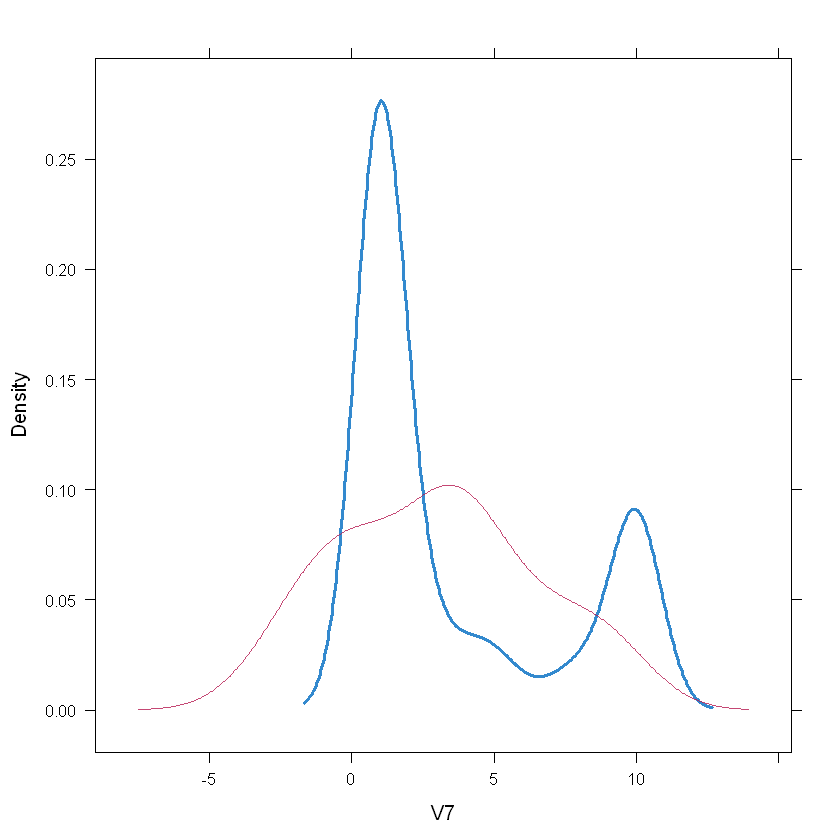

In [33]:
densityplot(imp.mice.pert)

In [34]:
completed_pert_cancer_data <- complete(imp.mice.pert)

**Checking the data quality by creating a regression model using the imputed data and checking the model quality**

In [35]:
lm.mice.out_pert <- with(imp.mice.pert, lm(V11 ~ V1+V2+V3+V4+V5+V6+V7+V8+V9+V10))
pool.mice_pert <- pool(lm.mice.out_pert)
summary(pool.mice_pert)

Warning message in pool(lm.mice.out_pert):
"Number of multiple imputations m = 1. No pooling done."


Call:
lm(formula = V11 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + 
    V10)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.91760 -0.16819 -0.01681  0.11971  1.54040 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.517e+00  4.319e-02  35.135  < 2e-16 ***
V1          -1.392e-08  2.412e-08  -0.577 0.564068    
V2           6.487e-02  7.276e-03   8.916  < 2e-16 ***
V3           4.399e-02  1.300e-02   3.384 0.000755 ***
V4           3.487e-02  1.270e-02   2.747 0.006175 ** 
V5           1.351e-02  8.114e-03   1.665 0.096436 .  
V6           1.640e-02  1.065e-02   1.540 0.124072    
V7           8.807e-02  6.582e-03  13.381  < 2e-16 ***
V8           4.202e-02  1.029e-02   4.084 4.95e-05 ***
V9           3.258e-02  7.569e-03   4.305 1.92e-05 ***
V10          7.010e-03  1.017e-02   0.689 0.490906    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3908 on 688 degrees of freedom
Multiple R-squ

**Here, the fitted regression model with the imputed values seem to have a p-value of < 0.001 . and R2 value of 83%**

#### Question 15.1

***Describe a situation or problem from your job, everyday life, current events, etc., for which optimization would be appropriate. What data would you need?***

One place I can think of where optimization will be a great fit is a warehouse unit. Example, Amazon's or Walmart's warehouses where the number of items stored to be retrieved (each can be its own data point). Optimization to figure out a warehouse layout and placing the items strategically to minimize time needed to stock and retrieve with minimal error, comes to my mind as a good optimization problem. Self driving cars, autonomous vehicles trying to solve transportation for the future itself is a huge optimization problem.

Or strategizing layout of roads and transportation in a new township is also a good problem. For the township problem, the data needed would be maximum number of residents that can stay at a given time in the township, maximum number of vehicles estimated on road, identifying whether the township will have a school district or hospitals (so as to device alternate routes), and the
end goal is to minimize the time for travel while also minimizing the predicted number of accidents (fatalities included) in the township.